<h4 align="right">by <a href="http://cs-people.bu.edu/usmn/"> Ben Usman</a> <br> with help of Kate Saenko, <br> Brian Kulis and Kun He <br> </h4>
# Problem Set 1 


## Preamble

To run and solve this assignment, one must have a working IPython Notebook installation. The easiest way to set it up for both Windows and Linux is to install [Anaconda](https://www.continuum.io/downloads). Then save this file ([`pset1.ipynb`](https://gist.githubusercontent.com/MInner/eb6330a655a5c37b82e15d1c84fd4cd0/raw/)) to your computer, run Anaconda and choose this file in Anaconda's file explorer. Use `Python 3` version. Below statements assume that you have already followed these instructions. If you are new to Python or its scientific library, Numpy, there are some nice tutorials [here](https://www.learnpython.org/) and [here](http://www.scipy-lectures.org/).

To run code in a cell or to render [Markdown](https://en.wikipedia.org/wiki/Markdown)+[LaTeX](https://en.wikipedia.org/wiki/LaTeX) press `Ctr+Enter` or `[>|]` button above. To edit any code or text cell [double]click on its content. To change cell type, choose "Markdown" or "Code" in the drop-down menu above.

We highly encourage students to put down their derivations into corresponding cells below. However, if one does not know LaTeX (and would find it too hard to learn it by looking at examples listed below between \$..\$), he or she might pass it in pen-and-paper format, however grading of these submissions might be delayed.

Put your solution into boxes marked with **`[double click here to add a solution]`** and press Ctr+Enter to render text. [Double]click on a cell to edit or to see its source code. You can add cells via **`+`** sign at the top left corner.

Submission instructions: please upload your completed solution file to Blackboard by the due date (see Schedule). If you have pen-and-paper answers, please hand them in in class on the same day. 

`Vector` stands for `column vector` below. Show all steps when proving statements.

### Problem 1: Closed-Form Maximum Likelihood

Assume that we are given $n$ iid samples $(x_1, ..., x_n)$ from each $P(x \ | \ \theta)$ below. Compute the maximum likelihood estimates (MLEs) for the parameter $\theta$ of given distributions. 

**Q1.1**: $P(x \ | \ \theta) = \theta e^{-\theta x}$ for $x \geq 0$

**Q1.2**: $P(x \ | \ \theta) = \frac{1}{\theta}$ for $ 0 \leq x \leq \theta$

**`[double click here to add a solution]`**

### Problem 2: Gradient for Maximum Likelihood Estimation

Sometimes, we can't find MLEs in closed-form, in this case, we can use an iterative scheme to solve resulting optimization problem $\theta_{MLE} = \arg\max P(x \ | \ \theta)$. First-order iterative schemes (e.g. Gradient Descent, Stochastic Gradient Descent, Nesterov Accelerated Gradient Descent) require gradient information at each visited point. Compute gradients for log-likelihood of the following model:

- we have $X \in \mathbf R^{n \times k}$ - constant data matrix, $\mathbf x_i$ - vector corresponding to a single data point
- $\theta$ is a $k$-dimensional (unknown) weight vector
- $\varepsilon \sim \text{Student}(v)$ is a $n$-dimensional (unknown) noise vector
- and we observe vector $\mathbf y = X\theta + \varepsilon$

Which means that
$$ P(y_i \ | \ \mathbf x_i, \theta, v) = \frac{1}{Z(v)} \Big(1 + \frac{(\theta^T \mathbf x_i - y_i)^2}{v}\Big)^{-\frac{v+1}{2}}$$

where $Z$ stands for a normalization constant that does not depend on $\theta$, and $v$ is a constant parameter.

Denote log-likelihood as $\mathcal L(\theta)$ and log-likelihood for a single sample $i$ as $\mathcal L_i(\theta) = \mathcal L(\theta \ | \ \mathbf x_i, y_i)$.

**Q2.1**: Find $\frac{\partial \mathcal L_i(\theta)}{\partial \theta}$.

**`[double click here to add a solution]`**

**Q2.2**: Check the result obtained in the previous section by coding an SGD for $\mathcal L(\theta)$ and plotting how function value changes as a function of a number of passed gradient steps. Try multiple learning rates (1e-1, 1e-3, 1e-6), explain the result.

We marked places where you are expected to add/change your own code with **`## -- ! code required`** comment.

In [34]:
import numpy as np
import matplotlib.pyplot as plt


def generate_data(n=100, k=10, v=4):
    X = np.random.rand(n, k)*2-1
    theta = np.random.rand(k, 1)
    noise = np.random.standard_t(4, n).reshape((-1, 1))
    return X, X @ theta + noise

def loss(X, y, theta):
    result1 = -2.5 * np.log(1 + 0.25*((theta.T @ X - y)**2))
    print(result1)
    return result1
    ## ! -- code required
   # pass

def loss_grad_i(X, y, theta, i):
    result2 = -6 * 
    pass

def sgd_plot(theta_init, X, y, n_steps=100):
    theta = theta_init[:]
    losses = []
    for step_n in range(n_steps):
        for i in range(X.shape[0]):
            theta = 0 ## ! -- code required
            loss_i = 0 ## ! -- code required
            losses.append(loss_i)
    plt.plot(losses)
    plt.show()
    
def main(n, k, v):
    print('1')
    X, y = generate_data(n, k, v)
    theta_init = np.random(k, 1)
    sgd_plot(theta_init, X, y)

main(100,10,4)

1


TypeError: 'module' object is not callable

**`[double click here to add a solution]`**

### Problem 3: Matrix Derivatives

**Q3.1: Multivariate Gaussian **

Assume that our data is distributed according to [multivariate Gaussian](https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Likelihood_function) with $\bar \mu$ mean and $\Sigma$ covariance matrix: $$(\mathbf x_1, \dots, \mathbf x_n) \sim \mathcal N(\bar \mu, \Sigma).$$ 

Using rules of [matrix derivatives](http://www2.imm.dtu.dk/pubdb/views/edoc_download.php/3274/pdf/imm3274.pdf) [57, 59], get a $\frac{\partial \mathcal L(\theta)}{\partial \Sigma}$ in matrix form.

**`[double click here to add a solution]`**

**Q3.2: Multi-target Linear Regression**
- we have $X \in \mathbf R^{n \times k}$ is a constant data matrix
- $\theta$ is a $k \times m$-dimentional weight matrix
- $\varepsilon_{ij} \sim \mathcal N(0, \sigma_\epsilon)$ is a normal noise ($i \in [0; n], j \in [0;m]$)
- and we observe a matrix $Y = X\theta + \varepsilon \in \mathbf R^{n \times m}$

$$\varepsilon = Y - X\theta \sim \mathcal N_n(0, \sigma_\epsilon I)$$

$$\mathcal L(\theta) = \log P(Y - X\theta \ | \ \theta) = \log \mathcal N_n(Y - X\theta \ | \ 0, \sigma_\epsilon I)$$

$$\theta_{MLE} = \arg \max_{\theta} \mathcal L(\theta) = \arg \min_{\theta} \big( ||Y-X\theta||^2_F \big)$$

In equations above $I$ stands for an identity matrix. Using rules of [matrix derivatives](http://www2.imm.dtu.dk/pubdb/views/edoc_download.php/3274/pdf/imm3274.pdf) [137, 132], show that:

**Q3.1.2:** $\frac{\partial\mathcal L(\theta)}{\partial \theta} = 2(Y-X\theta)^T X$

**Q3.1.2:** $\theta_{MLE} = (X^T X)^{-1} X^T Y$

**Hint:** in our case [see Matrix Cookbook, eq. 137], $g(U) = ||U||^2_F$ - squared Frobenius norm and $U(\theta) = f(\theta) = Y - \theta X$ - linear mapping.

**`[double click here to add a solution]`**

### Problem 4: Logistic Regression

Assume that we observe data generated via the following model:

- $X \in \mathbf R^{n \times k}$ - constant data matrix
- $\theta_j \sim \mathcal N(0, \sigma_\theta)$; $\theta$ is $k$-dimensional random vector
- $\varepsilon_i \sim \text{Logistic}(0, \sigma_\epsilon)$; $\varepsilon$ is $n$-dimensional random noise vector distributed according to [Logistic](https://en.wikipedia.org/wiki/Logistic_distribution) distribution
- and we observe $\mathbf y = \mathbf 1[X \theta + \varepsilon \geq 0]$ - boolean random vector

or, in other words: there exists some data $X$, we sample weights vector $\theta$ of the corresponding shape from multivariate normal distribution, multiply features from $X$ by weights from $\theta$, add random logistically distributed noise to resulting numbers, and observe whether resulting (noisy) random variable exceeds zero. So we are given the data matrix X and y, we want to estimate the weight vector $\theta$ as accurately as possible. 

Show that given model definition above, the following holds:

**Q4.1**: $ P(y_i = 1 \ | \ \theta, \mathbf x_i) = \text{logistic}(\theta^T \mathbf x_i)$

 where $ \text{logistic}(x) := \frac{1}{1+\exp(-x)}$ is a standard [logistic function](https://en.wikipedia.org/wiki/Logistic_function#Mathematical_properties), $\mathbf x_i$ denotes $i$-th data sample vector, $\mathbf 1[\dots]$ denotes indicator function
 
 **Hints:** 
 
 - use same principle as presented in previous problem: $\varepsilon = Y - X\theta \sim \mathcal N_n(0, \sigma_\epsilon) \Rightarrow P(Y - X\theta = a) = \mathcal N_n(a \ | \ 0, \sigma_\epsilon I) = \dots$
 - for an event $A$, what is $P(\mathbf 1[A] = 1)$ ? (answer: $P(A)$)
 - for a random variable $\zeta \sim P$ what is $P(\zeta \leq a)$ ? (answer: $F_{\zeta}(a)$ - value of cumulative density function for distribution of $\zeta$)

**`[double click here to add a solution]`**  

**Q4.2**: $ P(y_i \ | \ \theta, \mathbf x_i) = (\text{logistic}(\theta^T \mathbf x_i))^{y_i} (1-\text{logistic}(\theta^T \mathbf x_i))^{(1-y_i)}$

**`[double click here to add a solution]`**  

**Q4.3**: $ \log P(y_i \ | \ \theta, \mathbf x_i) = y_i \theta^T \mathbf x_i - \log(1 + \exp(\theta^T \mathbf x_i))$

**`[double click here to add a solution]`**  

The vector $\mathbf 1_{n \times 1}$ denotes column of ones.

**Q4.4**: $ \mathcal L_{MLE}(\theta) = \log P(\mathbf y \ | \ X, \theta) = y^T X \theta - \log(1 + \exp(X \theta)) \cdot \mathbf 1_{n \times 1}$

**`[double click here to add a solution]`**  

One way of estimating true weight vector $\theta$ is by finding an MLE estimate. To make use of prior information,  one might want to find [maximum a posteriori estimation](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation) (MAP) that can be derived from likelihood $P(X|\theta)$ and prior $P(\theta)$ over weights as following (Bayes rule):

$$ \theta_{MAP} = \arg\max_\theta P(\theta | X) = \arg\max_\theta \frac{P(X|\theta)P(\theta)}{\int_{\Theta} P(X|\theta)P(\theta) d \theta} = \arg\max_\theta \big[ \log P(X|\theta) + \log P(\theta) - \log \int_{\Theta} P(X|\theta)P(\theta) d \theta \big] \\ = \arg\max_\theta \big[ \log P(X|\theta) + \log P(\theta) \big] $$

In the model definition above, normal prior over weights is specified by line $\theta_j \sim \mathcal N(0, \sigma_\theta)$, which essentially means that "weight vector components should not be too far from zero".

**Q4.5**: $\mathcal L_{MAP}(\theta) = \log P(\theta \ | \ X, \mathbf y) = y^T X \theta - \log(1 + \exp(X \theta)) \cdot \mathbf 1_{n \times 1} - \lambda \ ||\theta||^2_2 $, $\lambda = \frac{1}{2\sigma_\theta}$

**`[double click here to add a solution]`**  

**Q4.6**: $\frac{\partial \mathcal L_{MAP}(\theta)}{\partial \theta} = X^T(y - \text{logistic}(X\theta))) - 2 \lambda \theta $

**`[double click here to add a solution]`**  

The prior part of the likelihood ($||\theta||_2^2$) may also be interpreted as [Tikhonov regularizer](https://en.wikipedia.org/wiki/Tikhonov_regularization). When the problem is ill-posed, it might have multiple solutions, and regularizer lets us define which of them is more preferable ("with the smaller L2 norm - in our case") by modifying loss, and as a result, letting an iterative scheme converge better.

**Q4.7**: What does $\lambda$ stand for?

**`[double click here to add a solution]`**  

### Problem 5: Coding Logistic Regression

**Don't be scared by the size of the coding part!** If you find my code below horribly disgusting or amazingly incomprehensible (underscore one) and don't want to read it, you can skip most parts that do not have **`## ! -- code required`** comment in them and just execute the rest without reading. However, I highly encourage you not to do so, to fully dive into the Zen of Python Plotting (a very useful skill!). Some bonuses and my personal respect will be granted to those who will tweak the plotting code in the coolest way or show intersting extra results.

Here's the code that generates data according to model specification (**Problem 4**) and plots for `k_features=2`.

C:\Users\haris\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


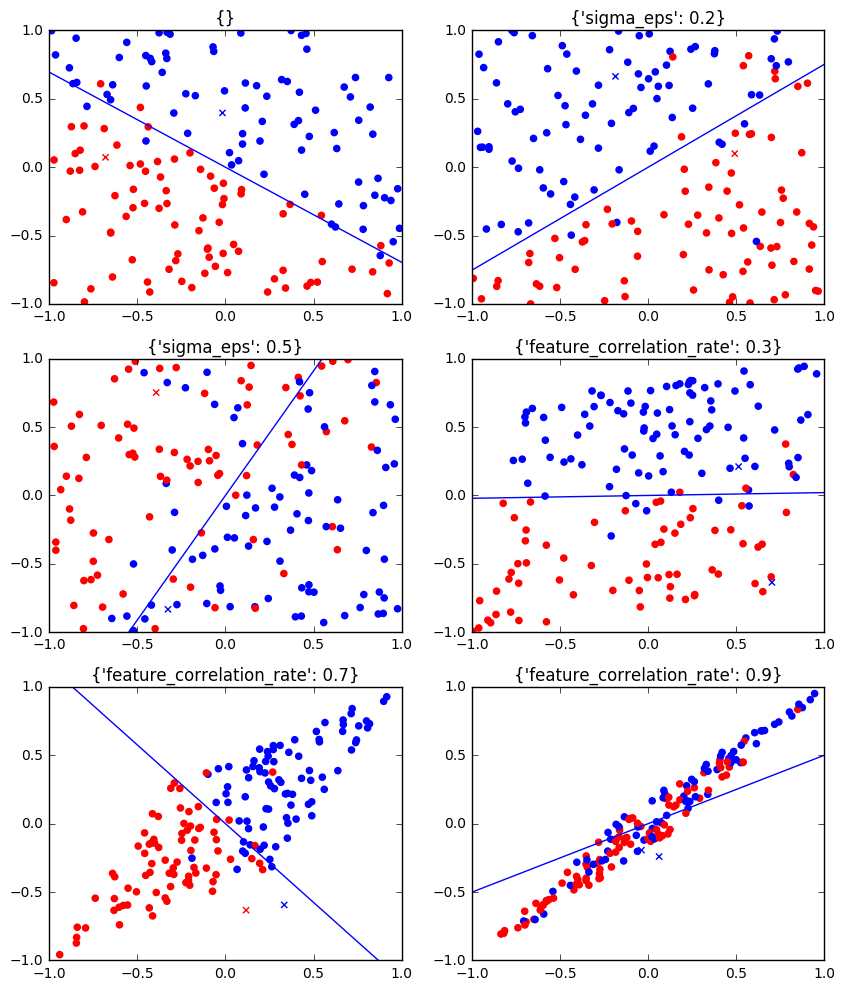

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_logistic_regression_data(n_samples=200, k_featues=2, sigma_eps=0.1, 
                                      sigma_theta=1, feature_correlation_rate=0, train_test_ratio=4):
    assert 0 <= feature_correlation_rate <= 1
    X_noncorr = np.random.rand(n_samples, k_featues)*2-1 # [0, 1] -> [-1, 1] center around zero
    mixture_matrix = np.eye(k_featues)*(1-feature_correlation_rate) + feature_correlation_rate/k_featues
    X = X_noncorr @ mixture_matrix
    theta_real = np.random.normal(scale=sigma_theta, size=k_featues).reshape((-1, 1)) # column
    noise = np.random.logistic(scale=sigma_eps, size=n_samples).reshape((-1, 1))
    y = ((X @ theta_real + noise) > 0).astype(np.int16).reshape((-1, 1))
    split_idx = int(n_samples * train_test_ratio / (train_test_ratio + 1))
    return X[:split_idx, :], y[:split_idx], X[split_idx:, :], y[split_idx:], theta_real

def plot_2d_data(subfig, X, y, X_test, y_test, theta):
    assert len(X.shape) == 2
    subfig.scatter(X[:, 0], X[:, 1], color = [['r', 'b'][c] for c in np.ravel(y)])
    point_color_arr = [['r', 'b'][c] for c in np.ravel(y_test)]
    subfig.scatter(X_test[0], X_test[1], marker='x', color = point_color_arr)
    subfig.plot((1, -1), (-theta[0]/theta[1], theta[0]/theta[1]))
    subfig.set_xlim(-1, 1)
    subfig.set_ylim(-1, 1)
    
def subfig_iter(it, val_name=None, n_col=2, base_size=(10,2), title=None, fmt='%s'):
    n_rows = int(len(it)/n_col) + len(it) % n_col
    size = (base_size[0], base_size[1]*len(it))
    fig, _axes = plt.subplots(n_rows, n_col, figsize=size)
    for subfig, val in zip(np.ravel(_axes).tolist(), it): 
        yield (val, subfig)
        if val_name is not None:
            if val_name == '':
                subtitle = fmt % (val)
            else:
                subtitle = ('%s = '+fmt) % (val_name, val)
            subfig.set_title(subtitle)
            subfig.legend(loc='best')
    if title is not None:
        fig.suptitle(title, verticalalignment='top') 

def test_draw():
    data_args_dicts = [
        dict(), {'sigma_eps': 0.2}, {'sigma_eps': 0.5}, {'feature_correlation_rate': 0.3}, 
        {'feature_correlation_rate': 0.7}, {'feature_correlation_rate': 0.9},
    ]
    for arg_dict, subfig in subfig_iter(data_args_dicts, val_name=''):
        data = generate_logistic_regression_data(**arg_dict)
        X_train, y_train, X_test, y_test, theta_real = data
        plt.title(str(arg_dict))
        plot_2d_data(subfig, X_train, y_train, X_test, y_test, theta_real)
        
    plt.show()

test_draw()

**Q5.1.1**: When we use `feature_correlation_rate` ($\alpha$) the following happens: we construct a matrix $M$ that has values $1 - \frac{n-1}{n}\alpha$ on the diagonal and values $\frac{\alpha}{n}$ everywhere else. What happens to resulting matrix $MX$ if $\alpha$ is either 0 or 1?

**`[double click here to add a solution]`**  

**Q5.1.2**: Explain what happens in this line (use `numpy` documentation to learn about [transposition](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.T.html), [broadcasting](https://docs.scipy.org/doc/numpy-dev/user/basics.broadcasting.html), [negative indices](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html#automatic-reshaping) for reshaping and [newaxis](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#basic-slicing-and-indexing))

    y = ((theta_real.T @ X + noise) > 0).astype(np.int16).reshape(-1, 1)

**`[double click here to add a solution]`**  

**Q5.1.3**: Why do we plot line $( (1, -\frac{\theta_0}{\theta_1}) ; (-1, \frac{\theta_0}{\theta_1}))$?

**`[double click here to add a solution]`**  

**Q5.2**: Why did we implement $\text{softplus}(x) = \log(1+\exp(x))$ as shown below? What is numerical under- and overflow and how people deal with it?

**`[double click here to add a solution]`**  

In [3]:
import numpy as np

def softplus(x_, limit=5):
    x = np.array(x_)
    compute_real_mask = np.logical_and(-limit < x, x < limit)
    return_same_mask = x >= limit
    computed_real_part = np.log(1 + np.exp(x*compute_real_mask)*compute_real_mask)
    returned_same_part = x*return_same_mask
    return computed_real_part + returned_same_part

def test_softplus():
    x_arr = np.linspace(-200, 200)
    softplus_true = np.log(1 + np.exp(x_arr))
    softplus_stable = softplus(x_arr)
    assert np.max(abs(softplus_true-softplus_stable)) < 1e-3
    
test_softplus()

def logistic(x):
    return 1/(1+np.exp(-x))

**Q5.3**: Write (by filling in the missing code below) Gradient Descent and Stochastic Gradient Descent algorithm for the MAP loss and plot 

- MAP loss
- L2 distance between current theta and true one
- cosine distance between current theta and true one

use results from **Q4.6, Q4.7**. Note that our loss is $loss(\theta) = -\mathcal L(\theta)$ and it is usually referred as "the negative log-likelihood".

In [4]:
from numpy.linalg import norm
from scipy.spatial.distance import cosine
import matplotlib.cm as cm

def logistic_MAP_loss(X, y, theta_current, lambd):
    return 0 ## ! -- code required

def logistic_MAP_loss_gradient(X, y, theta_current, lambd):
    return 0 ## ! -- code required

def logistic_MAP_loss_single_gradient(X, y, smaple_id, theta_current, lambd):
    x_i = X[smaple_id].reshape((1, -1))
    y_i = y[smaple_id].reshape((1, 1))
    return logistic_MAP_loss_gradient(x_i, y_i, theta_current, lambd)

def logistic_classification_accuracy(X, y, theta_current):
    return 0 ## ! -- code required

def run_MAP_gd(X, y, lambd, learning_rate = 0.01, max_epoch_n=200, init_theta=None):
    theta = init_theta if init_theta is not None else np.ones((X.shape[1], 1))*5
    steps = []
    for epoch_n in range(max_epoch_n):
        ## ! -- code required
        steps.append(theta)
    return steps

def run_MAP_sgd(X, y, lambd, learning_rate = 0.01, max_epoch_n=200, init_theta=None):
    theta = init_theta if init_theta is not None else np.ones((X.shape[1], 1))*5
    steps = []
    for epoch_n in range(max_epoch_n):
        for smaple_id in range(X.shape[0]):
            ## ! -- code required
            pass
        steps.append(theta)
    return steps

gd runtime: 0.07000000000000028
sgd runtime: 1.3399999999999999


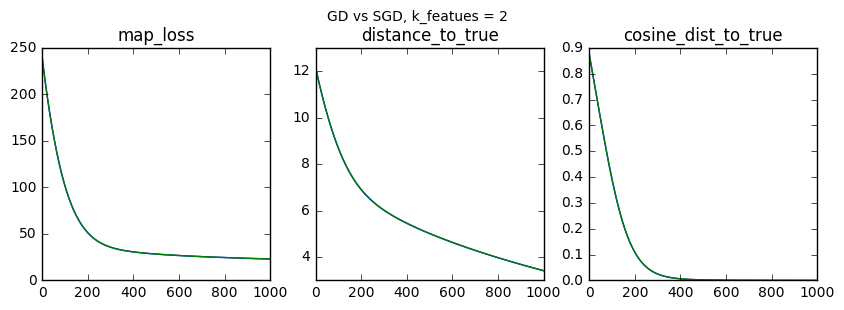

gd runtime: 1.0899999999999999
sgd runtime: 2.6000000000000014


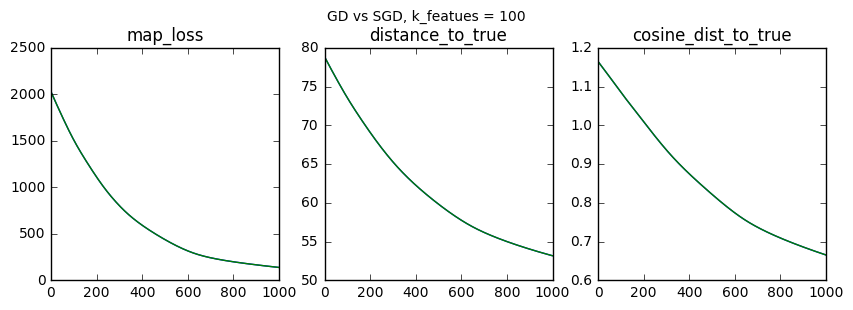

In [13]:
import time

def draw_gd_plots(axes, theta_steps, X, y, lambd, theta_real):
    collected_val_dicts = []
    for theta in theta_steps:
        collected_val_dicts.append({
                'distance_to_true': np.linalg.norm(theta-theta_real),
                'cosine_dist_to_true': cosine(theta, theta_real),
                'map_loss': float(logistic_MAP_loss(X, y, theta, lambd)),
            })
        
    
    for plot_id, key in enumerate(collected_val_dicts[0].keys()):
        subfig = axes[plot_id]
        subfig.set_title(key)
        subfig.plot(list(d[key] for d in collected_val_dicts))

def main():
    for k_featues in [2, 100]:
        data_args = {'n_samples': 200, 'k_featues': k_featues, 'sigma_eps': 0.3, 
                     'sigma_theta': 5, 'feature_correlation_rate': 0}
        data = generate_logistic_regression_data(**data_args)
        X_train, y_train, X_test, y_test, theta_real = data
        fig, axes = plt.subplots(1, 3, figsize=(10,3))
        lamdb = 0
        
        now = time.clock()
        steps = run_MAP_gd(X_train, y_train, lamdb, learning_rate=1e-3, max_epoch_n=1000)
        draw_gd_plots(axes, steps, X_train, y_train, lamdb, theta_real)
        print('gd runtime:', time.clock() - now)
        
        now = time.clock()
        steps = run_MAP_sgd(X_train, y_train, lamdb, learning_rate=1e-3, max_epoch_n=1000)
        draw_gd_plots(axes, steps, X_train, y_train, lamdb, theta_real)
        fig.suptitle('GD vs SGD, k_featues = %d' % k_featues, verticalalignment='bottom')
        print('sgd runtime:', time.clock() - now)
        
        plt.show()
    
main()

**Q5.3.1**: We expect loss to gradually decrease. Re-run code above several times (sgd might work differently). Explain plots above.

**`[double click here to add a solution]`**  

**Q5.4**: Complete the provided code below, and use it to draw several contour plots of logistic loss with different regularization parameter. Explain your results.

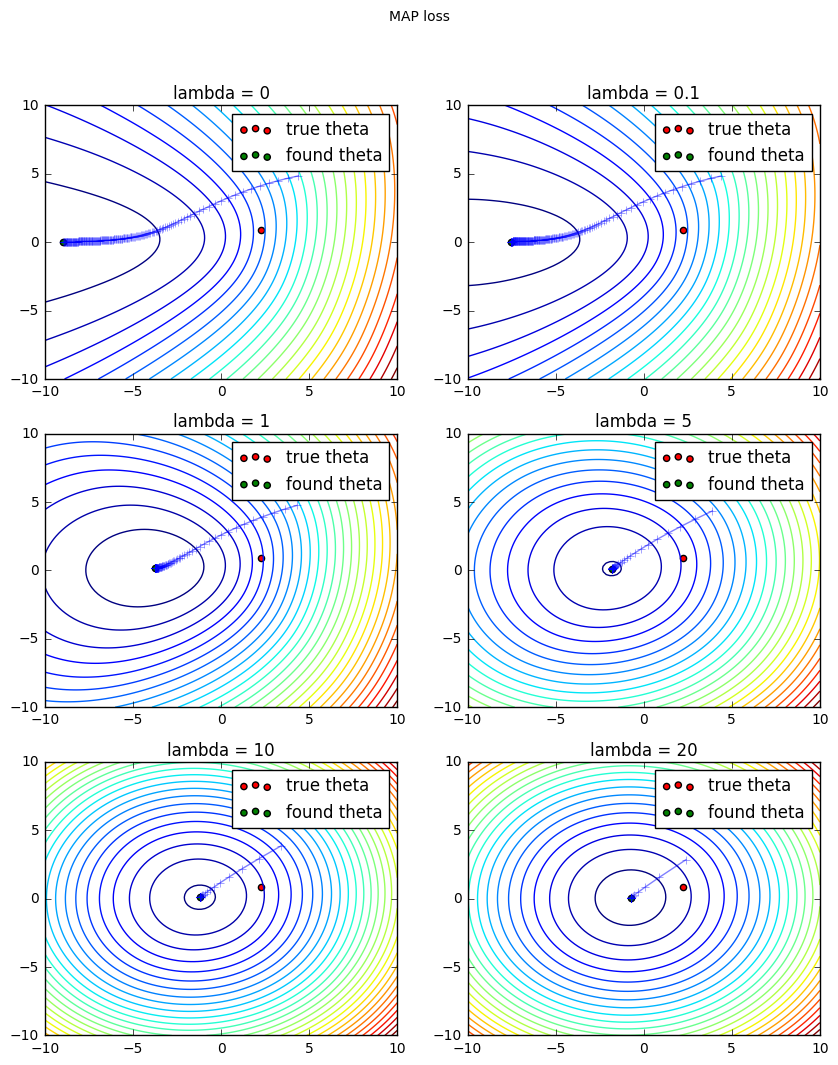

In [367]:
from itertools import product

def draw_f_contour(subfig, f, x_limits, n_lines=30, n=100):
    space = [np.linspace(*x_limit, n) for x_limit in x_limits]
    f_vals = np.array([f(np.array(v)) for v in product(*space)]).reshape(n, n).T
    subfig.set_xlim(*x_limits[0])
    subfig.set_ylim(*x_limits[1])
    subfig.contour(*space, f_vals, n_lines)
    
def draw_gd_steps(subfig, steps, func):
    around_space = list([-10, 10] for coord in theta_real)
    draw_f_contour(subfig, func, around_space)
    subfig.plot(np.hstack(steps)[0], np.hstack(steps)[1], marker='+', alpha=0.5)
    subfig.scatter(*np.ravel(theta_real), c='r', label='true theta')
    theta_best = steps[-1]
    subfig.scatter(*np.ravel(theta_best), c='g', label='found theta') 

def main():
    data_args = dict(n_samples=200, k_featues=2, sigma_eps=0.1, sigma_theta=5)
    data = generate_logistic_regression_data(**data_args)
    X_train, y_train, X_test, y_test, theta_real = data
    
    lambds = [0, 0.1, 1, 5, 10, 20]
    for lambd, subfig in subfig_iter(lambds, val_name='lambda', title='MAP loss'):
        steps = run_MAP_gd(X_train, y_train, lambd)
        draw_func = lambda theta: return 0 ## ! -- code required
        draw_gd_steps(subfig, steps, draw_func)
    plt.show()

main()

**`[double click here to add a solution]`**

**Q5.5**: Using the provided code below, draw several contour plots of logistic loss with different number of used samples. Explain your results.

In [14]:
def main():
    data_args = dict(n_samples=1000, k_featues=2, sigma_eps=0.1, sigma_theta=3)
    data = generate_logistic_regression_data(**data_args)
    X_train, y_train, X_test, y_test, theta_real = data

    for lambd in [0.0, 2.0]:    
        n_points_s = [1, 2, 10, 50, 100, 1000]
        figure_args = dict(val_name='n_points', title='lambda = %.2f' % lambd)
        for n_points, subfig in subfig_iter(n_points_s, **figure_args):
            cropped_xy = (X_train[:n_points], y_train[:n_points])
            steps = run_MAP_gd(*cropped_xy, lambd)
            draw_func = lambda th: logistic_MAP_loss(*cropped_xy, th, lambd)
            draw_gd_steps(subfig, steps, draw_func)
        plt.show()
        
main()

**`[double click here to add a solution]`**

**Q5.6**: Using the provided code below, draw several contour plots of logistic loss with different degrees of feature interdependence. Explain your results.

In [16]:
def main():
    rates = np.linspace(0, 0.9, 4)
    for feature_correlation_rate, subfig in subfig_iter(rates, val_name='feature_correlation_rate'):
        data_args['feature_correlation_rate'] = feature_correlation_rate
        data = generate_logistic_regression_data(**data_args)
        X_train, y_train, X_test, y_test, theta_real = data
        steps = run_MAP_gd(X_train, y_train, 0)
        draw_func = lambda th: logistic_MAP_loss(X_train, y_train, th, 0)
        draw_gd_steps(subfig, steps, draw_func)
    plt.show()

main()

**`[double click here to add a solution]`**

**Q5.7**: Using the provided code below, draw plots of train\test loss with different parameters. Explain your results.

In [17]:
from collections import OrderedDict

def draw_losses():
    arg_ranges = OrderedDict([
        ('k_featues', np.linspace(10, 300, 40).astype(int)),
        ('n_samples', np.linspace(10, 300, 40).astype(int)),
        ('feature_correlation_rate', np.linspace(0, 1, 50).astype(float)),
        ('sigma_eps', np.linspace(0.01, 5, 50).astype(float)),
    ])

    k_range = [2, 100]
    l2_lambda = 0
    overall_iterator = subfig_iter(list(product(arg_ranges.items(), k_range)), n_col=2)
    for ((arg_name, arg_vals), k_featues_default), subfig in overall_iterator:
        collected_val_dics = []
        for arg_val in arg_vals:
            data_args = dict(n_samples=200, k_featues=k_featues_default, sigma_eps=0.1, 
                             sigma_theta=1, feature_correlation_rate=0, train_test_ratio=4)
            data_args.update({arg_name: arg_val})
            data = generate_logistic_regression_data(**data_args)
            X_train, y_train, X_test, y_test, theta_real = data
            init_theta = np.zeros((data_args['k_featues'], 1))
            
            gd_args = dict(max_epoch_n=100, init_theta=init_theta)
            steps = run_MAP_gd(X_train, y_train, l2_lambda, **gd_args)
            best_theta = steps[-1]
            
            train_acc = logistic_classification_accuracy(X_train, y_train, best_theta)
            test_acc = logistic_classification_accuracy(X_test, y_test, best_theta)
            collected_val_dics.append(
                OrderedDict([
                    ('train_acc', train_acc),
                    ('test_acc', test_acc)
                ]))

        for key, color in zip(collected_val_dics[0].keys(), ['b', 'g']):
            subfig.set_title('%s (k_featues_default = %s)'%(arg_name, k_featues_default))
            track_vals = list(d[key] for d in collected_val_dics)
            subfig.plot(arg_vals, track_vals, marker='.', label=key, color=color, alpha=0.1)
            ws = 7
            assert ws % 2 == 1
            half_ws = int((ws-1)/2)
            track_vals_avg = np.convolve(track_vals, np.ones(ws)/ws, mode='valid')
            plot_args = dict(color=color, label=key+'_avg')
            subfig.plot(arg_vals[half_ws:-half_ws], track_vals_avg, '--', **plot_args)
            subfig.set_ylim(0.4, 1.05)
            subfig.set_ylabel('accuracy')
    plt.show()

draw_losses()

**`[double click here to add a solution]`**

.

.

.

Wow, you made it this far, that is impressive. Congratulations!